<a href="https://colab.research.google.com/github/leticiagabriellesilva/car-evaluation-ML-pipeline/blob/main/pipeline_avaliacao_carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto 2 de IA: Avaliação de Carros

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from google.colab import drive

# Conectar ao google drive
drive.mount('/content/drive')

# Colunas
colunas = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Arquivo do drive
# Observação: O padrão é '/content/drive/MyDrive/' caso o arquivo esteja na raiz do drive.
caminho_arquivo = '/content/drive/MyDrive/projeto-2-IA/car.data'

try:
    df = pd.read_csv(caminho_arquivo, names=colunas)
    print("Sucesso! Arquivo car.data carregado do Google Drive.")
except FileNotFoundError:
    print(f"ERRO: O arquivo não foi encontrado no caminho: {caminho_arquivo}")
    print("Dica: Verifique se o nome está correto ou se está dentro de uma pasta.")

# Estatísticas iniciais
print("\n Visualização Inicial: ")
display(df.head())

print("\n Informações dos Dados: ")
print(df.info())

print("\n Distribuição das Classes: ")
print(df['class'].value_counts())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Sucesso! Arquivo car.data carregado do Google Drive.

--- Visualização Inicial ---


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc



--- Informações dos Dados ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None

--- Distribuição das Classes ---
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [12]:
# Mapeamento
# Dados baseados na doc [cite: 7, 24, 25, 26]
mapa_buying_maint = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
mapa_doors = {'2': 2, '3': 3, '4': 4, '5more': 5}
mapa_persons = {'2': 2, '4': 4, 'more': 5}
mapa_lug_boot = {'small': 0, 'med': 1, 'big': 2}
mapa_safety = {'low': 0, 'med': 1, 'high': 2}
mapa_class = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

df_processed = df.copy()
df_processed['buying'] = df_processed['buying'].map(mapa_buying_maint)
df_processed['maint'] = df_processed['maint'].map(mapa_buying_maint)
df_processed['doors'] = df_processed['doors'].map(mapa_doors)
df_processed['persons'] = df_processed['persons'].map(mapa_persons)
df_processed['lug_boot'] = df_processed['lug_boot'].map(mapa_lug_boot)
df_processed['safety'] = df_processed['safety'].map(mapa_safety)
df_processed['class'] = df_processed['class'].map(mapa_class)

# Shuffle das linhas
df_shuffled = df_processed.sample(frac=1, random_state=42).reset_index(drop=True)

# Divisão em Treino (70%), Validação (15%) e Teste (15%)
X = df_shuffled.drop('class', axis=1)
y = df_shuffled['class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print(f"Treino: {len(X_train)}, Validação: {len(X_val)}, Teste: {len(X_test)}")

Treino: 1209, Validação: 259, Teste: 260


Resultados ->
Acurácia no Teste: 98.08%


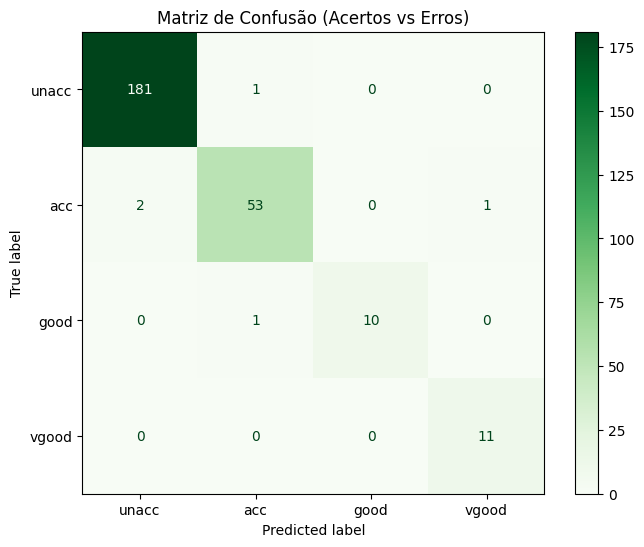

In [13]:
# Treinamento
modelo = DecisionTreeClassifier(random_state=42, max_depth=12)
modelo.fit(X_train, y_train)

# Avaliação
y_pred = modelo.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)

print(f"Resultados ->")
print(f"Acurácia no Teste: {acuracia:.2%}")

# Matriz de Confusão
# Legenda: unacc - inaceitável / acc - aceitável / good - bom / vgood - muito bom
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['unacc', 'acc', 'good', 'vgood'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Greens', ax=ax)
plt.title("Matriz de Confusão (Acertos vs Erros)")
plt.show()

In [14]:
# Predição
# Exemplo: Carro com manutenção barata, segurança média, mas preço de compra baixo
dados_predicao = {
    'buying': [0],  # preço de compra
    'maint': [0],   # manutenção barata
    'doors': [2],   # portas
    'persons': [4], # quantas pessoas
    'lug_boot': [2], # porta-malas
    'safety': [2]   # segurança média
}

novo_carro_df = pd.DataFrame(dados_predicao, columns=colunas)

predicao = modelo.predict(novo_carro_df)
classes_originais = {v: k for k, v in mapa_class.items()}

print(f"Predição para o novo carro: {classes_originais[predicao[0]].upper()}")

Predição para o novo carro: VGOOD
